In [29]:
import numpy as np    # linear algebra

import pandas as pd    # Data processing, Input & Output load

import matplotlib.pyplot as plt    # Visualization & plotting

import seaborn as sns

import statsmodels.api as sm

from math import sqrt

In [30]:
import tensorflow as tf

In [31]:
from scipy import stats

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression    # Linear Regression Algorithm

from sklearn.linear_model import Lasso, LassoCV    # Lasso Regression Algorithm

from sklearn.linear_model import Ridge    # Ridge Regression Algorithm

from sklearn.linear_model import ElasticNet    # ElasticNet Algorithm

from sklearn.svm import SVR, LinearSVR    # Support Vector Regressor

from sklearn.tree import DecisionTreeRegressor    # Decision Tree Regressor

from sklearn.ensemble import RandomForestRegressor # Random Forest Regressor

from sklearn.ensemble import GradientBoostingRegressor    # Gradient Boosting Regressor

from sklearn.ensemble import AdaBoostRegressor    # Ada Boost Regressor

In [32]:
import joblib  #Joblib is a set of tools to provide lightweight pipelining in Python (Avoid computing twice the same thing)

from sklearn.model_selection import train_test_split as tts

from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedKFold

                                    # GridSearchCV - Implements a “fit” and a “score” method

                                    # train_test_split - Split arrays or matrices into random train and test subsets

                                    # cross_val_score - Evaluate a score by cross-validation



from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.metrics import f1_score, precision_score, accuracy_score, roc_auc_score, recall_score, roc_curve

from sklearn.metrics import make_scorer, confusion_matrix, classification_report   # Differnt metrics to evaluate the model




import warnings    # To avoid warning messages in the code run

warnings.filterwarnings('ignore')

sns.set_style('darkgrid')

In [33]:
from tensorflow import keras

from tensorflow.keras import layers, callbacks

In [34]:
def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)


    models_fit = {}
    model_scores = {}



    for name, model in models.items():

        model.fit(X_train, y_train)
        models_fit[name] = model
        model_scores[name] = model.score(X_test, y_test)


    model_scores = pd.DataFrame(model_scores, index=['Accuracy'])

    model_scores = model_scores.transpose().sort_values('Accuracy')

    return model_scores, models_fit

In [35]:
# Data loaded

data = pd.read_csv('/Users/harithakarimi/Desktop/Haritha/Machine learning/bodyfat.csv')



data_new = data.copy()



data_new.head()



#Exploratory Data Analysis



# Data categorization



num_cols = data_new.select_dtypes(include = [np.number]).columns.tolist()



num_cols = data_new.drop(['BodyFat'], axis = 1).select_dtypes(include = [np.number]).columns.tolist()

<AxesSubplot:>

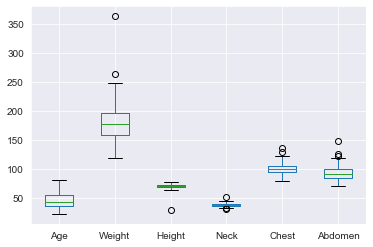

In [36]:
# Data visualization box plots

data_new.boxplot(column = ['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen'])

<AxesSubplot:>

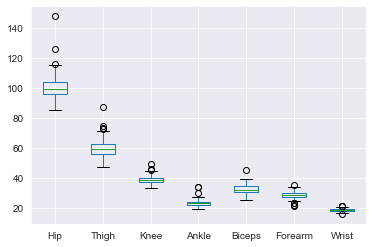

In [37]:
data_new.boxplot(column = ['Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'])

In [38]:
#Feature Engineering

#null value check

data_new.isnull().sum(axis = 0)

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [39]:
#separating target value from data frame

X = data_new.drop(['BodyFat'], axis = 1)

y = data_new['BodyFat']

# Performing Train, Test & Split

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 42)



print('Train Shape: ', X_train.shape)

print('Test Shape: ', X_test.shape)

Train Shape:  (201, 14)
Test Shape:  (51, 14)


In [40]:
#scaling

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [41]:
models = {'Ridge' : Ridge(), 'Lasso' : Lasso(), 'ElasticNet' : ElasticNet(), 'SVR' : SVR(),

          'DecisionTreeRegressor' : DecisionTreeRegressor(), 'RandomForestRegressor': RandomForestRegressor(),

          'GradientBoostingRegressor': GradientBoostingRegressor(), 'AdaBoostRegressor': AdaBoostRegressor()}

baseline_model_scores_data_new_final, models_fit = fit_and_score(models, X_train, X_test, y_train, y_test)
print(baseline_model_scores_data_new_final)

                           Accuracy
SVR                        0.767325
ElasticNet                 0.845281
AdaBoostRegressor          0.952160
Lasso                      0.979456
Ridge                      0.990746
DecisionTreeRegressor      0.991747
GradientBoostingRegressor  0.998288
RandomForestRegressor      0.998927


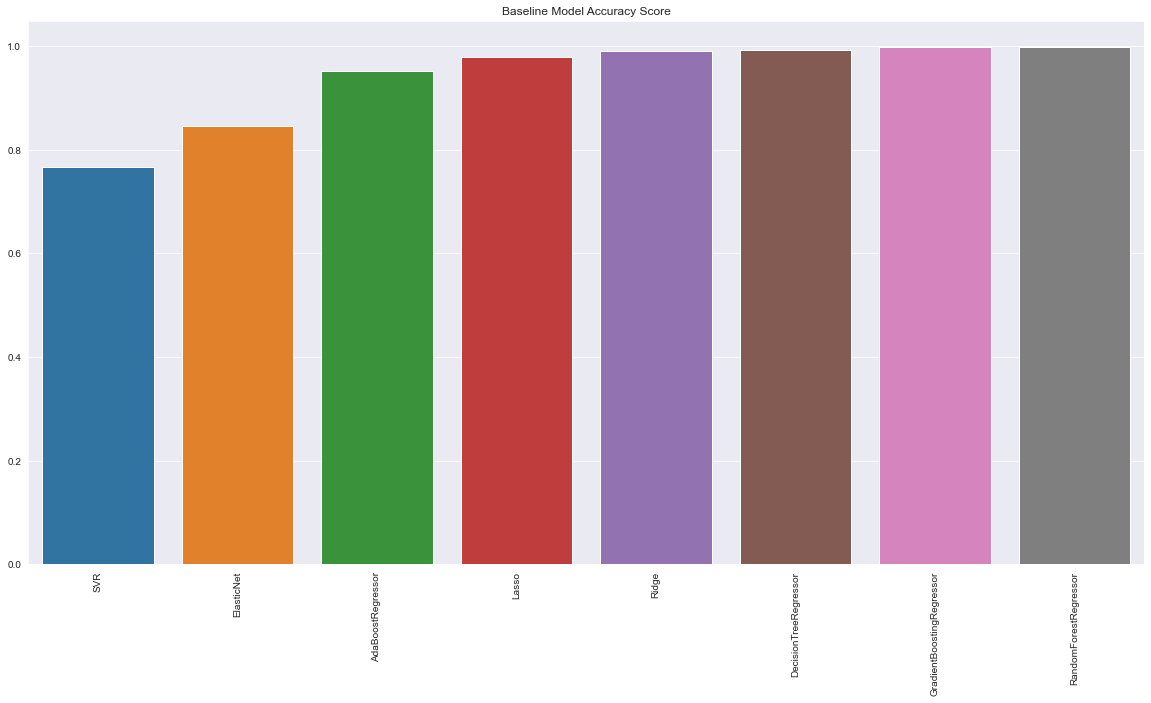

In [15]:
# Sorting baseline model basis their accuracy scores



baseline_model_scores_data_new_final.sort_values('Accuracy')

plt.figure(figsize=(20,10))

sns.barplot(data=baseline_model_scores_data_new_final.T)

plt.title('Baseline Model Accuracy Score')

plt.xticks(rotation=90);

In [16]:
tf.keras.backend.clear_session()
tf.random.set_seed(60)

In [17]:
model=keras.models.Sequential([
    
    keras.layers.Dense(512, input_dim = X_train.shape[1], activation='relu'),  
    keras.layers.Dense(512, input_dim = X_train.shape[1], activation='relu'),  
    keras.layers.Dense(units=256,activation='relu'),  
    keras.layers.Dense(units=256,activation='relu'),    
    keras.layers.Dense(units=128,activation='relu'),
    keras.layers.Dense(units=1, activation="linear"),
],name="Initial_model",)
model.summary()

Model: "Initial_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               7680      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 500,481
Trainable params: 500,481
Non-trainable params: 0
_______________________________________________

2021-11-28 21:24:47.099865: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer, loss='mae')

In [19]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    validation_data=(X_test, y_test), 
                    verbose=1)

2021-11-28 21:25:00.657092: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
7/7 [==============================] - 1s 46ms/step - loss: 18.6892 - val_loss: 13.2889
Epoch 2/100
7/7 [==============================] - 0s 8ms/step - loss: 12.9419 - val_loss: 8.8657
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 7.7019 - val_loss: 6.7835
Epoch 4/100
7/7 [==============================] - 0s 18ms/step - loss: 6.1495 - val_loss: 5.1508
Epoch 5/100
7/7 [==============================] - 0s 22ms/step - loss: 4.7705 - val_loss: 3.9144
Epoch 6/100
7/7 [==============================] - 0s 50ms/step - loss: 3.4345 - val_loss: 3.8337
Epoch 7/100
7/7 [==============================] - 0s 48ms/step - loss: 3.1028 - val_loss: 3.2659
Epoch 8/100
7/7 [==============================] - 0s 40ms/step - loss: 2.6851 - val_loss: 3.0733
Epoch 9/100
7/7 [==============================] - 1s 139ms/step - loss: 2.3697 - val_loss: 2.5767
Epoch 10/100
7/7 [==============================] - 0s 21ms/step - loss: 2.3570 - val_loss: 2.4599
Epoch 11/100
7/7

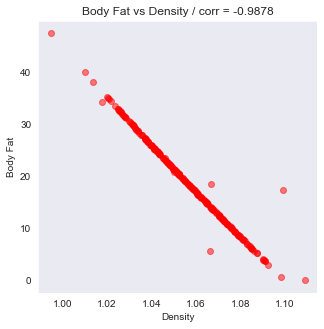

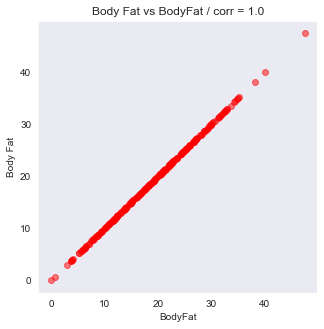

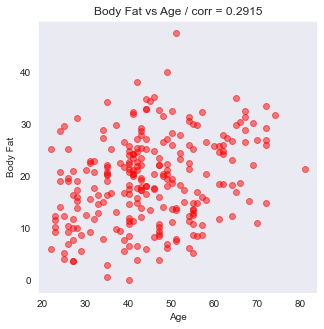

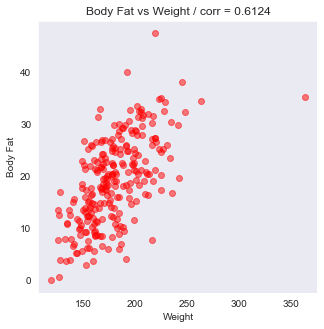

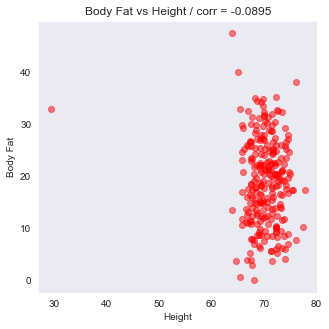

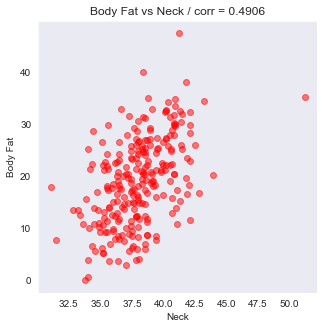

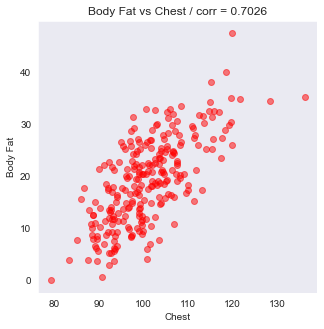

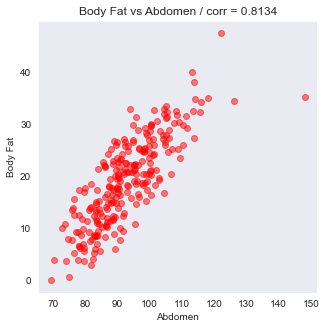

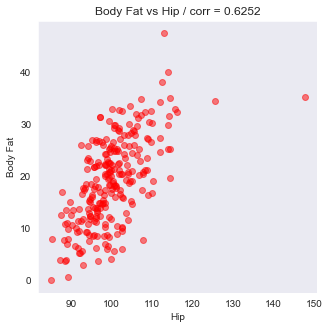

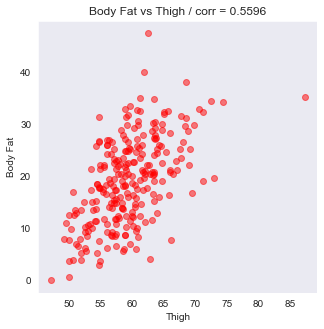

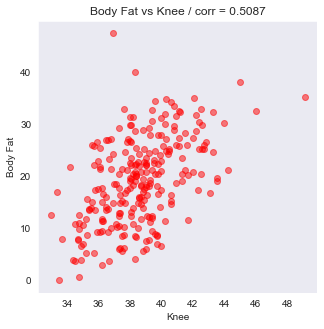

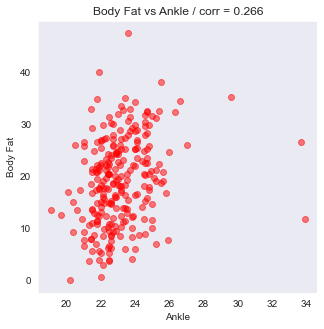

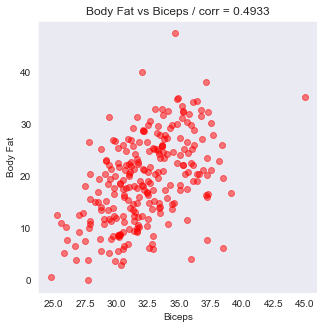

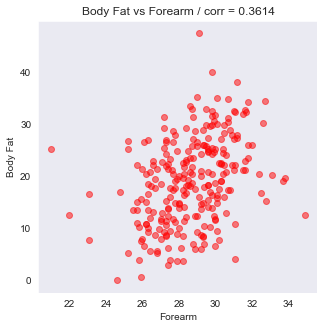

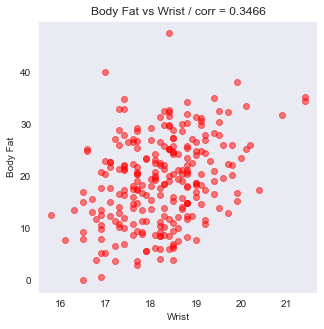

In [42]:
#graphs

features = data_new.columns.tolist()

for f in features:

    c = data_new[f].corr(data_new.BodyFat, method='pearson')

    c = np.round(c,4)

    plt.figure(figsize=(5,5))

    plt.scatter(data_new[f], data_new.BodyFat, alpha=0.5, color='red')

    plt.title('Body Fat vs ' + f + ' / corr = ' + str(c))

    plt.xlabel(f)

    plt.ylabel('Body Fat')

    plt.grid()

    plt.show()

In [21]:
#higher resolution graph
X_grid = np.arange(np.min(X_test),np.max(X_test),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
 

In [22]:
X_test.shape

(51, 14)

In [23]:
y_test.shape

(51,)

ValueError: x and y must be the same size

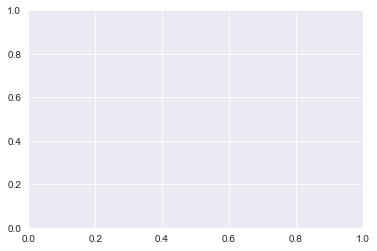

In [24]:
plt.scatter(X_grid, y_test, color='red') #plotting real points

In [25]:
output_ = models_fit['RandomForestRegressor'].predict(X_test)

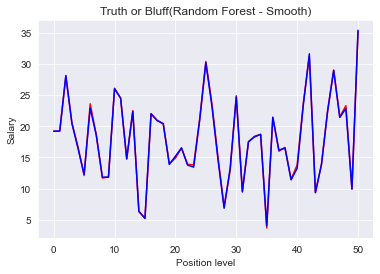

In [26]:
# plt.scatter(range(len(X_grid)))

# plt.plot(y_test, color='red')
# plt.plot(output_, color='blue') #plotting for predict points
plt.plot(range(len(y_test)), y_test, color='red')
plt.plot(range(len(output_)), output_, color='blue')
plt.title("Truth or Bluff(Random Forest - Smooth)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [27]:
from sklearn.inspection import partial_dependence, plot_partial_dependence


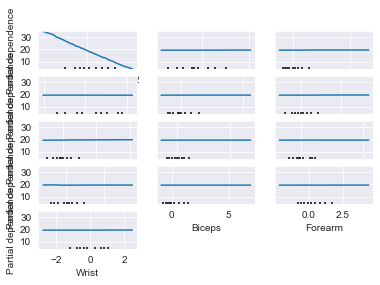

In [28]:
my_plots = plot_partial_dependence(models_fit['RandomForestRegressor'],       
                                   features=[0,1,2,3,4,5,6,7,8,9,10,11,12], # column numbers of plots we want to show
                                   X=X_test,            # raw predictors data.
                                   feature_names=['Age', 'Weight', 'Height', 'Neck', 'Chest', 'Abdomen','Hip', 'Thigh', 'Knee', 'Ankle', 'Biceps', 'Forearm', 'Wrist'], # labels on graphs
                                   grid_resolution=100)

In [43]:
dnn_pred=model.predict(X_test)

In [44]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,dnn_pred))

MAE 1.0310798850713991


In [45]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,dnn_pred))

MSE 3.1751310970705706


In [47]:
print("RMSE",np.sqrt(mean_squared_error(y_test,dnn_pred)))

RMSE 1.7818897544659071
